In [186]:
from sklearn.datasets import load_iris, load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline



In [162]:
iris = load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [184]:
class KnnClassifier:
    def __init__(self, k,X_train, Y_train):
        self.k = k
        self.X_train = X_train
        self.Y_train = Y_train
        
    def euclidean_distance(self,x_test):
        nn_index = np.argsort(np.sqrt(np.sum(np.square(x_test - self.X_train), axis=1)))[0:self.k]
        return nn_index

    def majority_class(self,nn_index):
        counts = Counter(self.Y_train[nn_index])
        y_pred = counts.most_common(n=1)[0][0]

        return y_pred

    def fit(self, X_test):
        y_preds = []
        for x in X_test:
            nn_index = self.euclidean_distance(x)
            y_pred = self.majority_class(nn_index)
            y_preds.append(y_pred)

        return np.array(y_preds)
    
    def accuracy(self, y_pred, y_test):
        return np.sum(y_pred == y_test)*1.0/len(y_pred)
    

#### Choose k with highest validation accuracy

In [182]:
train_acc = []
for i in range(2,100):
    knn = KnnClassifier(i,X_train, Y_train)
    y_preds = knn.fit(X_train)
    train_acc.append(knn.accuracy(y_preds, Y_train))

        
    
val_acc = []
for i in range(2,100):
    knn = KnnClassifier(i,X_train, Y_train)
    y_preds = knn.fit(X_test)
    val_acc.append(knn.accuracy(y_preds, Y_test))



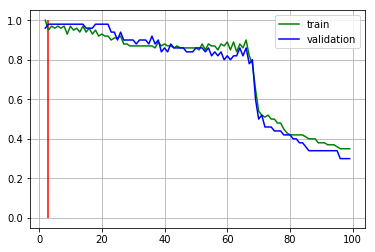

In [183]:
x_range = list(range(2,100))

train, = plt.plot(x_range, train_acc, c = 'g', label = 'train')
val, = plt.plot(x_range, val_acc, c = 'b', label = 'validation')
plt.vlines(x=3,ymin=0, ymax=1, colors='r', label = 'Highest Val Acc')
plt.legend(handles=[train, val])
plt.grid()
plt.show()

- K = 3 gives highest validation accuracy for our dataset.
- For smaller values of k have higher accuracy, larger value tends to generalize well on train data

In [199]:
class KnnRegressor:
    def __init__(self, k,X_train, Y_train):
        self.k = k
        self.X_train = X_train
        self.Y_train = Y_train
        
    def euclidean_distance(self,x_test):
        nn_index = np.argsort(np.sqrt(np.sum(np.square(x_test - self.X_train), axis=1)))[0:self.k]
        return nn_index

    def mean_nn_score(self,nn_index):
        y_pred = np.mean(self.Y_train[nn_index])

        return y_pred

    def fit(self, X_test):
        y_preds = []
        for x in X_test:
            nn_index = self.euclidean_distance(x)
            y_pred = self.mean_nn_score(nn_index)
            y_preds.append(y_pred)

        return np.array(y_preds)
    
    def rmse(self, y_pred, y_test):
        return round(np.sqrt(np.sum((y_pred - y_test)**2)),4)
    

In [200]:
np.sum((y_preds-Y_test)**2)

525688.1111111111

In [207]:
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [208]:
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((296, 10), (296,), (146, 10), (146,))

In [209]:
knn = KnnRegressor(3,X_train, Y_train)
y_preds = knn.fit(X_test)
val_rmse = knn.rmse(y_preds, Y_test)

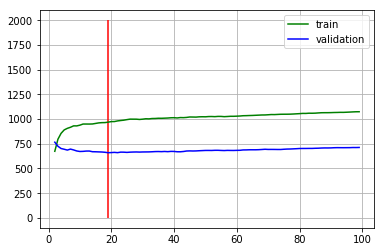

In [218]:
train_rmse = []
for i in range(2,100):
    knn = KnnRegressor(i,X_train, Y_train)
    y_preds = knn.fit(X_train)
    train_rmse.append(knn.rmse(y_preds, Y_train))

        
    
val_rmse = []
for i in range(2,100):
    knn = KnnRegressor(i,X_train, Y_train)
    y_preds = knn.fit(X_test)
    val_rmse.append(knn.rmse(y_preds, Y_test))


x_range = list(range(2,100))

train, = plt.plot(x_range, train_rmse, c = 'g', label = 'train')
val, = plt.plot(x_range, val_rmse, c = 'b', label = 'validation')
plt.vlines(x=x_range[np.argsort(np.array(val_rmse))[0]],ymin=0, ymax=2000, colors='r', label = 'Highest Val Acc')
plt.legend(handles=[train, val])
plt.grid()
plt.show()